In [7]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np

# Subplots

<IPython.core.display.Javascript object>


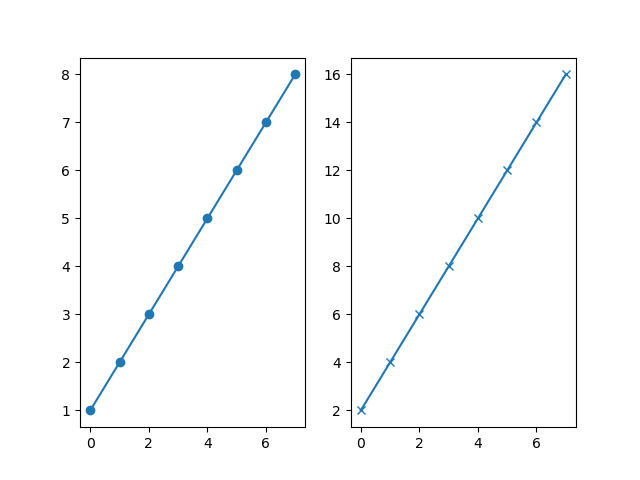

In [8]:
plt.figure()
plt.subplot(1,2,1)
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

In [9]:
exponetial_data = linear_data*2
plt.subplot(1,2,2)
plt.plot(exponetial_data, '-x')

<IPython.core.display.Javascript object>


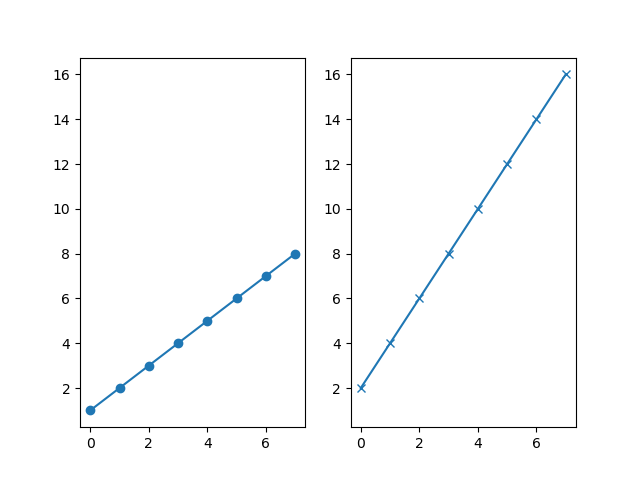

In [12]:
#共用坐标轴
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1,2,2, sharey=ax1, sharex=ax1)
plt.plot(exponetial_data, '-x')

<IPython.core.display.Javascript object>


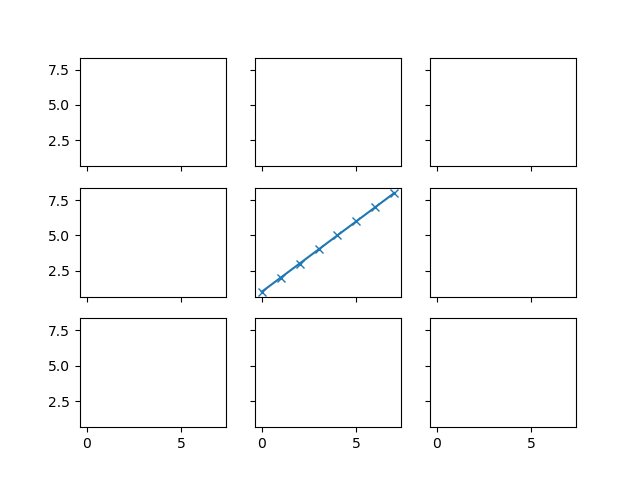

In [18]:
#3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9))=plt.subplots(3,3,sharey=True, sharex=True)
ax5.plot(linear_data, '-x')

In [21]:
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [22]:
plt.gcf().canvas.draw()

## Histograms

<IPython.core.display.Javascript object>


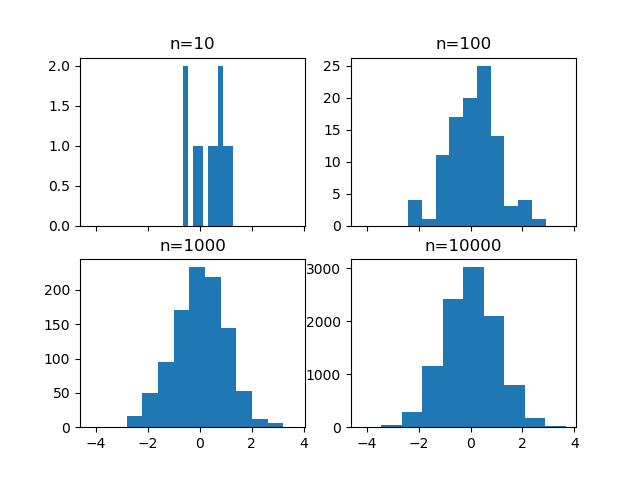

In [25]:
#创建2x2 subplots
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True)
axs = [ax1,ax2,ax3,ax4]
for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))
    

<IPython.core.display.Javascript object>


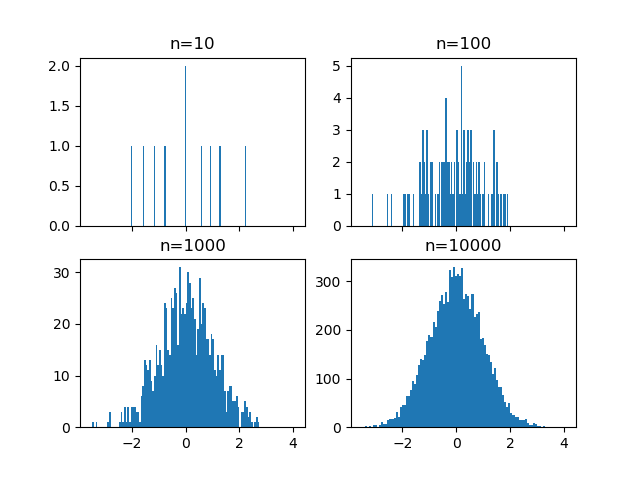

In [26]:
#创建2x2 subplots
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True)
axs = [ax1,ax2,ax3,ax4]
for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


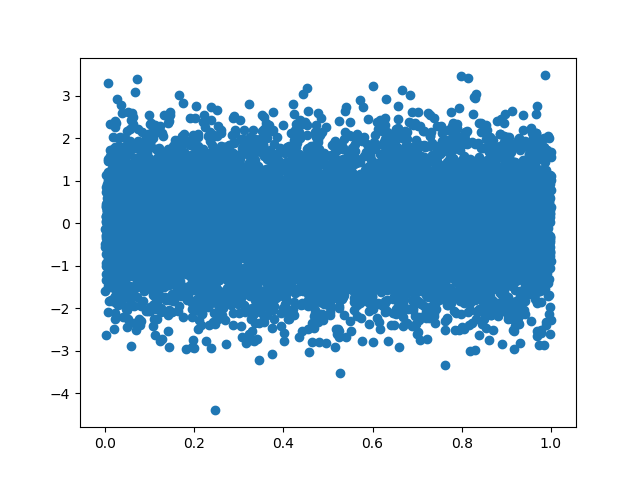

In [27]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X= np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


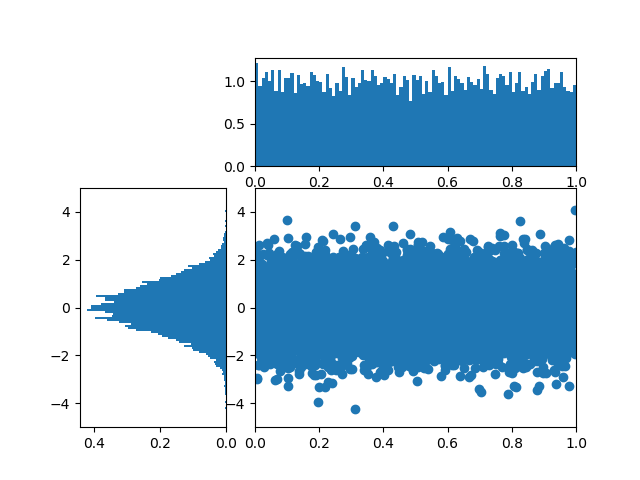

In [29]:
import matplotlib.gridspec as gridspec
plt.figure()
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot(gspec[0,1:])
side_histogram = plt.subplot(gspec[1:,0])
low_histogram = plt.subplot(gspec[1:,1:])

In [32]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X= np.random.random(size=10000)
low_histogram.scatter(X, Y)
top_histogram.hist(X,bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [34]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [38]:
# change axes limits
for ax in [top_histogram, low_histogram]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, low_histogram]:
    ax.set_ylim(-5, 5)

## 箱型图

In [40]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [44]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,2.005288,-0.006518,0.504094
std,1.398067,1.003498,0.288805
min,0.021958,-3.553387,0.000164
25%,0.974842,-0.686046,0.255162
50%,1.692864,-0.004601,0.503484
75%,2.714901,0.677591,0.756645
max,12.113559,3.875961,0.999749


<IPython.core.display.Javascript object>


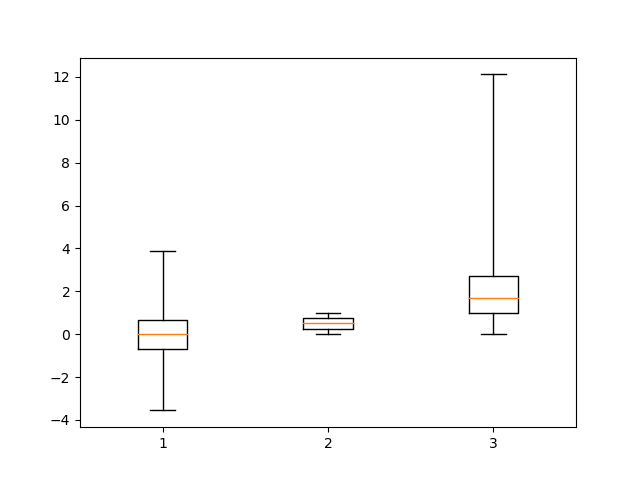

In [46]:
plt.figure()
_=plt.boxplot(df['normal'], whis='range')

In [47]:
# clear the current figure
plt.clf()
# plot plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


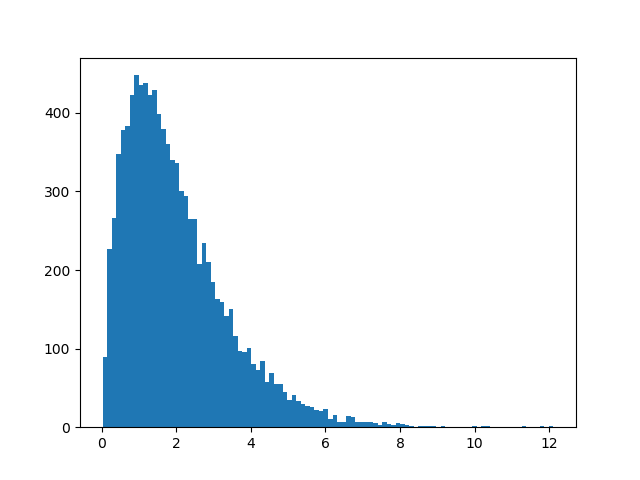

In [48]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


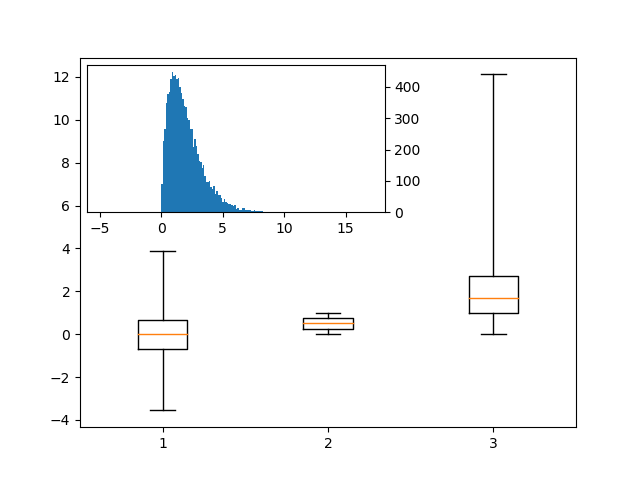

In [50]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [51]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


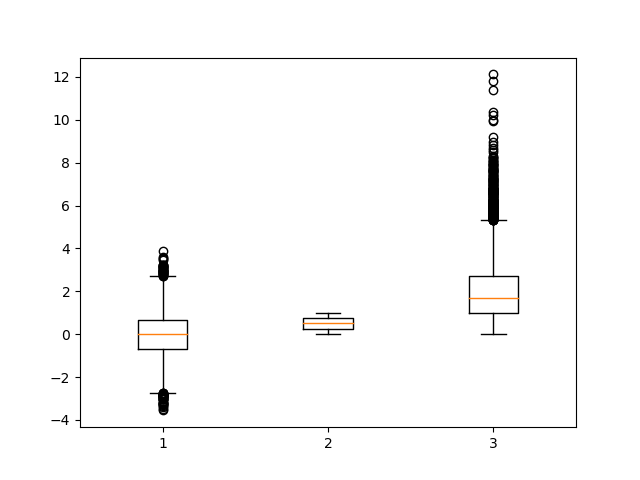

In [52]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

## 热力图

<IPython.core.display.Javascript object>


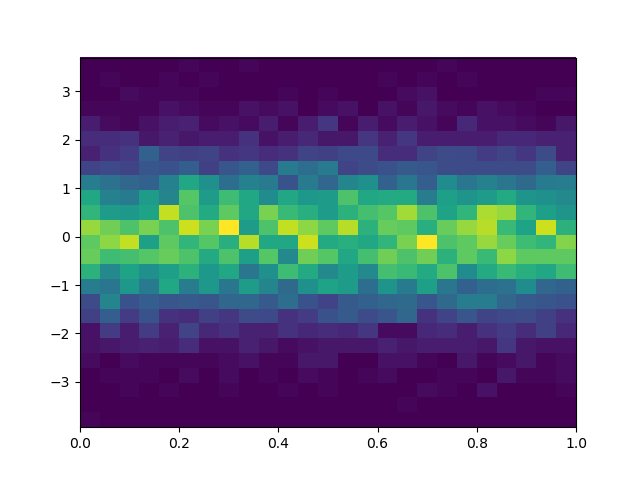

In [53]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


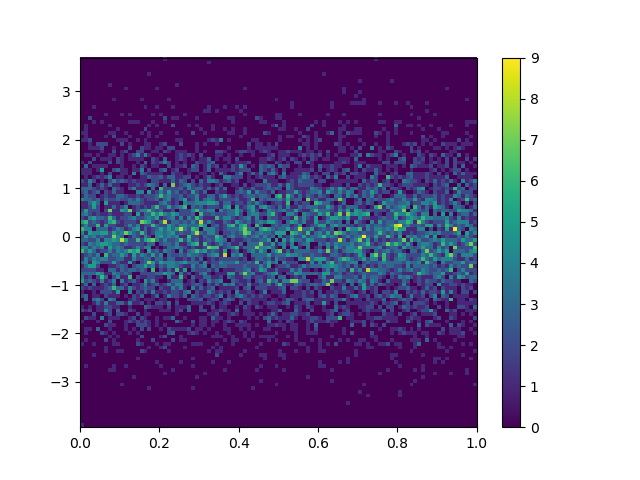

In [54]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [55]:
# add a colorbar legend
plt.colorbar()

In [58]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')

<IPython.core.display.Javascript object>


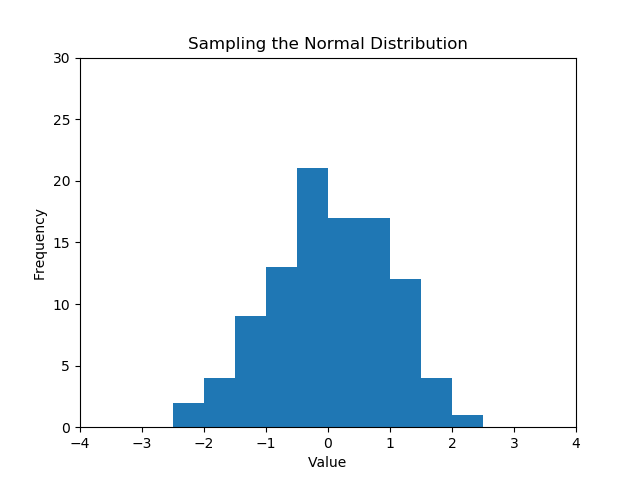

In [59]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

<IPython.core.display.Javascript object>


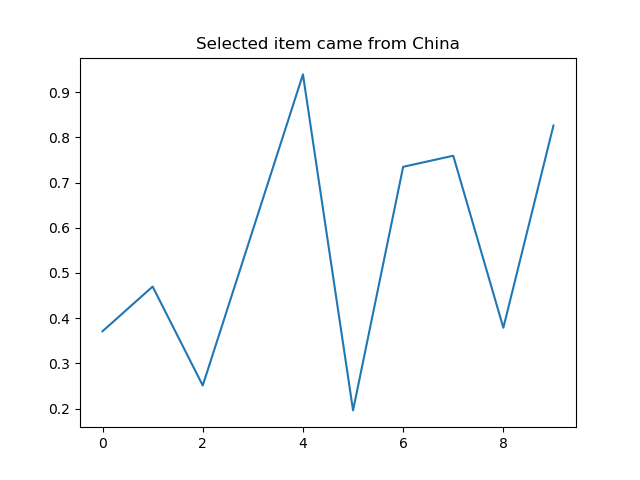

8

In [60]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [62]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,origin,weight
0,0.323169,UK,0.623544
1,0.754876,Brazil,0.411423
2,0.330988,Canada,0.212782
3,0.508919,Germany,0.717659
4,0.051232,India,0.794327
5,0.390583,Chile,0.790711
6,0.432550,USA,0.796747
7,0.106698,China,0.418658
8,0.646878,Mexico,0.718018
9,0.989410,Iraq,0.478681


<IPython.core.display.Javascript object>


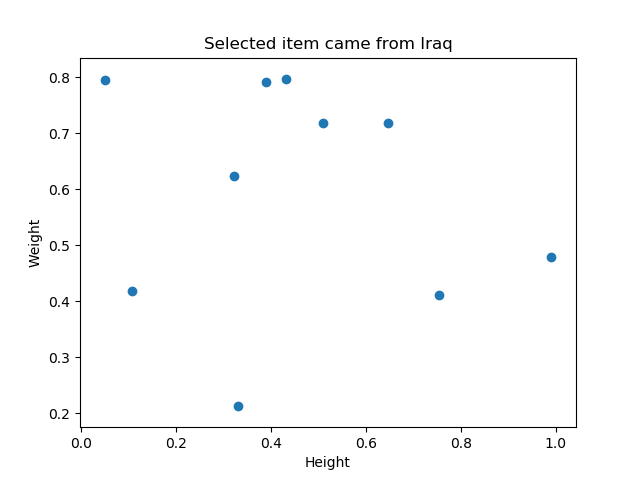

Text(0.5,0,'Height')

In [63]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

In [64]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

8